In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model.selection import train_test_split 



In [2]:
df = pd.read_json('data/data.json')
df.head(3)

ValueError: Expected object or value

In [6]:
df.describe()


approx_payout_date   body_length      channels  delivery_method  \
count        1.433700e+04  14337.000000  14337.000000     14321.000000   
mean         1.350933e+09   3672.521936      6.176676         0.439564   
std          2.401300e+07   5758.113003      3.860333         0.591487   
min          1.171256e+09      0.000000      0.000000         0.000000   
25%          1.334221e+09    750.000000      5.000000         0.000000   
50%          1.355805e+09   1990.000000      6.000000         0.000000   
75%          1.370646e+09   4280.000000      8.000000         1.000000   
max          1.523488e+09  65535.000000     13.000000         3.000000   

       event_created     event_end  event_published   event_start  \
count   1.433700e+04  1.433700e+04     1.423800e+04  1.433700e+04   
mean    1.345825e+09  1.350501e+09     1.340854e+09  1.350205e+09   
std     2.404107e+07  2.401299e+07     8.750386e+07  2.398787e+07   
min     1.170332e+09  1.170824e+09     0.000000e+00  1.170819e+09   
25%     1.329754e+09  1.333789e+09     1.329499e+09  1.333406e+09   
50%     1.351043e+09  1.355373e+09     1.351099e+09  1.355000e+09   
75%     1.365346e+09  1.370214e+09     1.365478e+09  1.370048e+09   
max     1.382012e+09  1.523056e+09     1.381608e+09  1.418850e+09   

       fb_published            gts       ...         org_facebook  \
count  14337.000000   14337.000000       ...         14278.000000   
mean       0.127433    2430.231492       ...             7.974436   
std        0.333468    9142.308260       ...            11.761241   
min        0.000000       0.000000       ...             0.000000   
25%        0.000000     116.410000       ...             0.000000   
50%        0.000000     431.930000       ...             0.000000   
75%        0.000000    1547.260000       ...            14.000000   
max        1.000000  306293.930000       ...            91.000000   

        org_twitter  sale_duration  sale_duration2      show_map  \
count  14278.000000   14182.000000    14337.000000  14337.000000   
mean       4.306976      46.869694       50.576759      0.844179   
std        6.011520      54.825253       59.678090      0.362698   
min        0.000000   -1094.000000    -1094.000000      0.000000   
25%        0.000000      16.000000       17.000000      1.000000   
50%        0.000000      32.000000       35.000000      1.000000   
75%       11.000000      59.000000       63.000000      1.000000   
max       34.000000     980.000000      980.000000      1.000000   

           user_age  user_created     user_type  venue_latitude  \
count  14337.000000  1.433700e+04  14337.000000    13261.000000   
mean     374.226547  1.313492e+09      2.711097       35.221736   
std      418.593616  4.152174e+07      1.606726       20.207588   
min        0.000000  1.011210e+09      1.000000      -45.045208   
25%       13.000000  1.286824e+09      1.000000       33.959338   
50%      242.000000  1.316636e+09      3.000000       39.974104   
75%      603.000000  1.346790e+09      3.000000       44.857040   
max     3794.000000  1.381543e+09    103.000000       64.844022   

       venue_longitude  
count     13261.000000  
mean        -59.490368  
std          66.569034  
min        -159.390183  
25%         -96.957828  
50%         -79.425579  
75%          -3.187449  
max         176.169492  

[8 rows x 27 columns]

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [8]:
# We only want to worry about fraudster_event, fraudster_att, fraudster
df.acct_type.unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'], dtype=object)

In [9]:
def add_fraud(acct_type):
    if acct_type in ['fraudster_event','fraudster','fraudster_att']:
        return 1
    else:
        return 0
    
df['fraud'] = df.acct_type.apply(add_fraud)

In [10]:
df.head(3)

acct_type  approx_payout_date  body_length  channels country  \
0  fraudster_event          1266062400         3852         5      US   
1          premium          1296720000         3499         0      US   
2          premium          1296172800         2601         8      US   

  currency  delivery_method  \
0      USD              0.0   
1      USD              1.0   
2      USD              1.0   

                                         description    email_domain  \
0  <p><a href="http://s432.photobucket.com/albums...       gmail.com   
1  <p>Join us for a quick, one-night, community-b...         ruf.org   
2  <h3><span class="subcategory"><strong>Teacher ...  pvsd.k12.ca.us   

   event_created  ...   user_age  user_created  user_type  \
0     1262739706  ...         36    1259613950          1   
1     1293832670  ...        149    1280942776          3   
2     1291090956  ...        214    1272559388          3   

                  venue_address  venue_country  venue_latitude  \
0         717 Washington Avenue             US       25.777471   
1                                           US       32.776566   
2  10100 Pioneer Blvd Suite 100             US       33.944201   

   venue_longitude                              venue_name venue_state fraud  
0       -80.133433             INK Nightclub - South Beach          FL     1  
1       -79.930922                 The Charleston, SC area          SC     0  
2      -118.080419  Los Angeles County Office of Education          CA     0  

[3 rows x 45 columns]

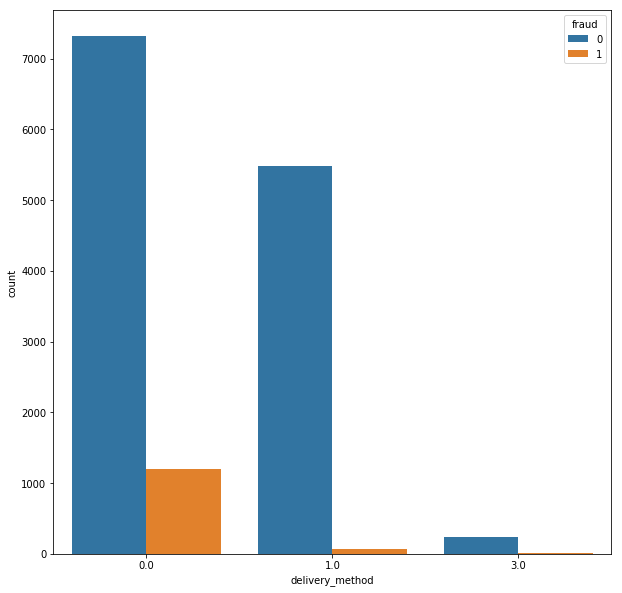

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
g = sns.countplot(x=df['delivery_method'],hue=df['fraud'])
#df[df['fraud']==1].count()

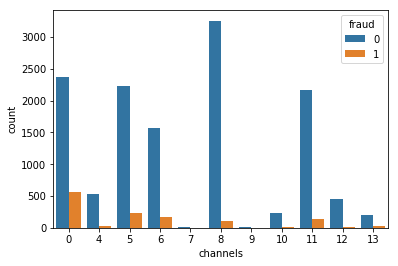

In [44]:
g = sns.countplot(x=df['channels'],hue=df['fraud'])

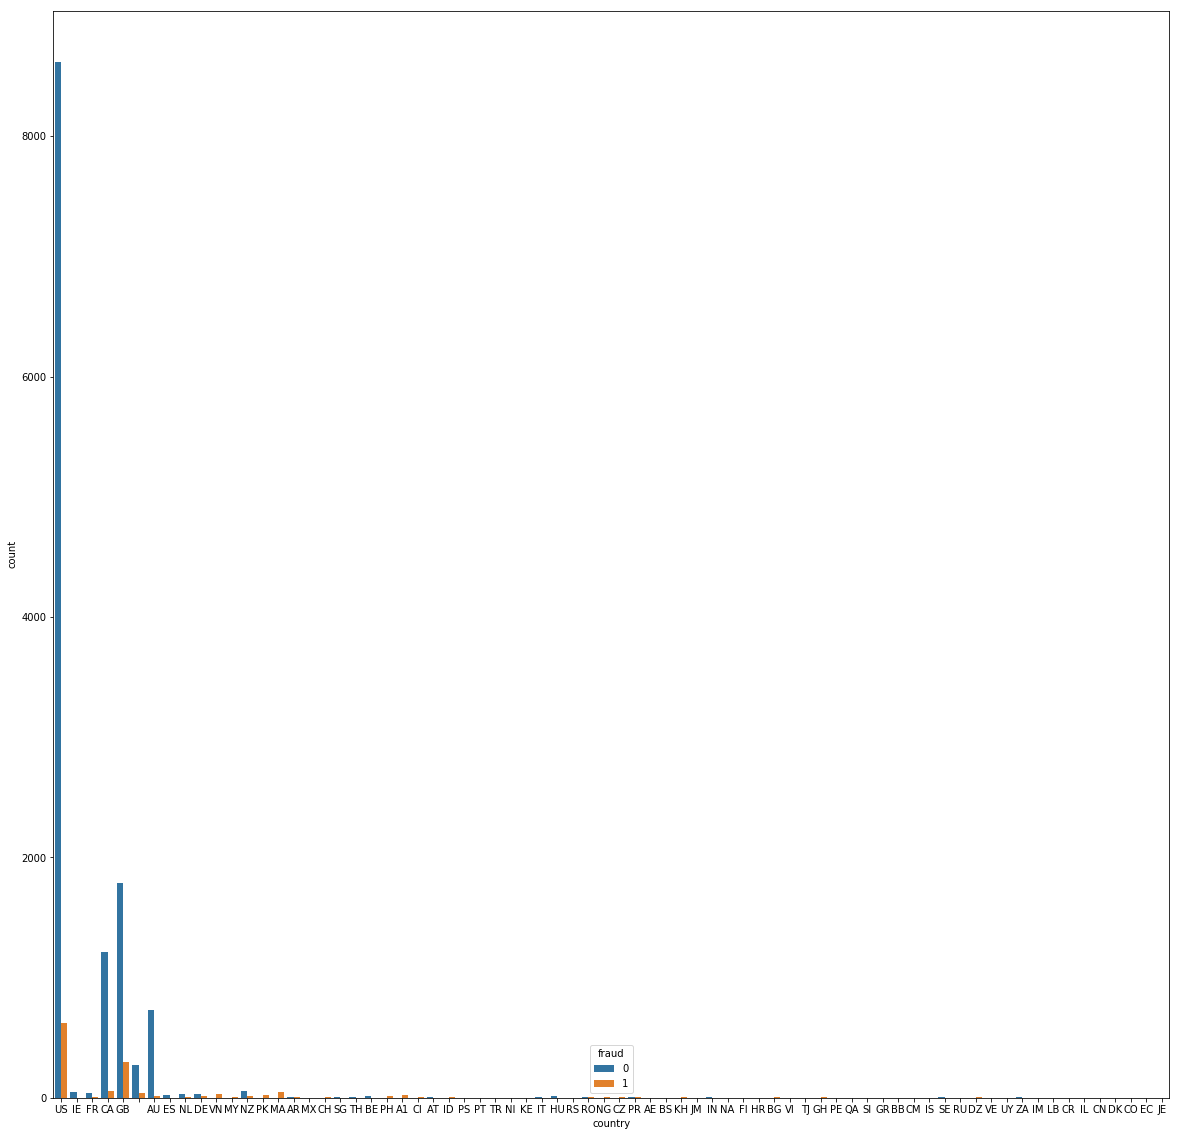

In [53]:
f, ax = plt.subplots(figsize=(20, 20))
g = sns.countplot(x=df['country'],hue=df['fraud'])

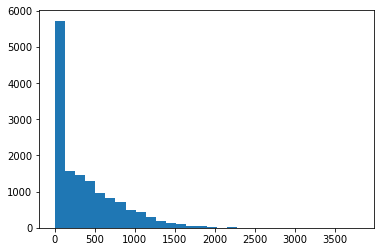

In [14]:

_= plt.hist(df['user_age'],bins=30)

In [63]:
df['ticket_types'][14332]

[{'availability': 1,
  'cost': 45.0,
  'event_id': 5456442,
  'quantity_sold': 0,
  'quantity_total': 400}]

In [52]:
df[['ticket_types','fraud']]

ticket_types  fraud
0      [{'event_id': 527017, 'cost': 25.0, 'availabil...      1
1      [{'event_id': 786878, 'cost': 35.0, 'availabil...      0
2      [{'event_id': 787337, 'cost': 93.51, 'availabi...      0
3      [{'event_id': 885645, 'cost': 25.0, 'availabil...      0
4      [{'event_id': 1114349, 'cost': 150.0, 'availab...      0
5      [{'event_id': 1179983, 'cost': 8.0, 'availabil...      0
6      [{'event_id': 1180179, 'cost': 22.63, 'availab...      0
7      [{'event_id': 1180391, 'cost': 14.0, 'availabi...      0
8      [{'event_id': 1180423, 'cost': 250.0, 'availab...      0
9      [{'event_id': 1180435, 'cost': 14.0, 'availabi...      0
10     [{'event_id': 1180497, 'cost': 27.5, 'availabi...      0
11     [{'event_id': 1213143, 'cost': 30.0, 'availabi...      0
12     [{'event_id': 1245411, 'cost': 92.57, 'availab...      0
13     [{'event_id': 1245735, 'cost': 30.0, 'availabi...      0
14     [{'event_id': 1245809, 'cost': 150.0, 'availab...      0
15     [{'event_id': 1278699, 'cost': 10.0, 'availabi...      0
16     [{'event_id': 1278715, 'cost': 10.0, 'availabi...      0
17     [{'event_id': 1310811, 'cost': 10.0, 'availabi...      0
18     [{'event_id': 1310849, 'cost': 474.08, 'availa...      0
19     [{'event_id': 1310985, 'cost': 170.0, 'availab...      0
20     [{'event_id': 1311215, 'cost': 150.0, 'availab...      0
21     [{'event_id': 1311633, 'cost': 100.0, 'availab...      0
22     [{'event_id': 1343963, 'cost': 50.0, 'availabi...      0
23     [{'event_id': 1376573, 'cost': 9.4, 'availabil...      0
24     [{'event_id': 1376585, 'cost': 15.0, 'availabi...      0
25     [{'event_id': 1377131, 'cost': 50.0, 'availabi...      0
26     [{'event_id': 1386643, 'cost': 300.0, 'availab...      1
27     [{'event_id': 1442103, 'cost': 8.46, 'availabi...      0
28     [{'event_id': 1442185, 'cost': 3702.3, 'availa...      0
29     [{'event_id': 1507459, 'cost': 35.0, 'availabi...      0
...                                                  ...    ...
14307  [{'event_id': 5203584, 'cost': 18.0, 'availabi...      0
14308  [{'event_id': 5214384, 'cost': 15.0, 'availabi...      0
14309  [{'event_id': 5236232, 'cost': 676.07, 'availa...      0
14310  [{'event_id': 5236400, 'cost': 15.0, 'availabi...      0
14311  [{'event_id': 5247262, 'cost': 17.91, 'availab...      0
14312  [{'event_id': 5268524, 'cost': 25.0, 'availabi...      0
14313  [{'event_id': 5268608, 'cost': 21.0, 'availabi...      0
14314  [{'event_id': 5268624, 'cost': 168.21, 'availa...      0
14315  [{'event_id': 5268914, 'cost': 15.7, 'availabi...      0
14316  [{'event_id': 5301408, 'cost': 120.0, 'availab...      1
14317  [{'event_id': 5301434, 'cost': 8.0, 'availabil...      0
14318  [{'event_id': 5307036, 'cost': 55.0, 'availabi...      1
14319  [{'event_id': 5307210, 'cost': 235.26, 'availa...      0
14320  [{'event_id': 5323578, 'cost': 2.17, 'availabi...      0
14321  [{'event_id': 5334324, 'cost': 50.0, 'availabi...      0
14322  [{'event_id': 5334600, 'cost': 8.51, 'availabi...      0
14323  [{'event_id': 5334712, 'cost': 30.0, 'availabi...      0
14324  [{'event_id': 5348476, 'cost': 10.0, 'availabi...      0
14325  [{'event_id': 5350990, 'cost': 649.65, 'availa...      1
14326  [{'event_id': 5367108, 'cost': 10.0, 'availabi...      0
14327  [{'event_id': 5394728, 'cost': 60.43, 'availab...      0
14328  [{'event_id': 5399400, 'cost': 13.45, 'availab...      0
14329  [{'event_id': 5399402, 'cost': 13.45, 'availab...      0
14330  [{'event_id': 5400186, 'cost': 8.46, 'availabi...      0
14331  [{'event_id': 5452146, 'cost': 470.2, 'availab...      0
14332  [{'event_id': 5456442, 'cost': 45.0, 'availabi...      1
14333  [{'event_id': 5465112, 'cost': 90.0, 'availabi...      0
14334  [{'event_id': 5465732, 'cost': 20.0, 'availabi...      0
14335  [{'event_id': 5465810, 'cost': 79.33, 'availab...      0
14336  [{'event_id': 5492990, 'cost': 283.0, 'availab...      1

[14337 rows x 2 columns]

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


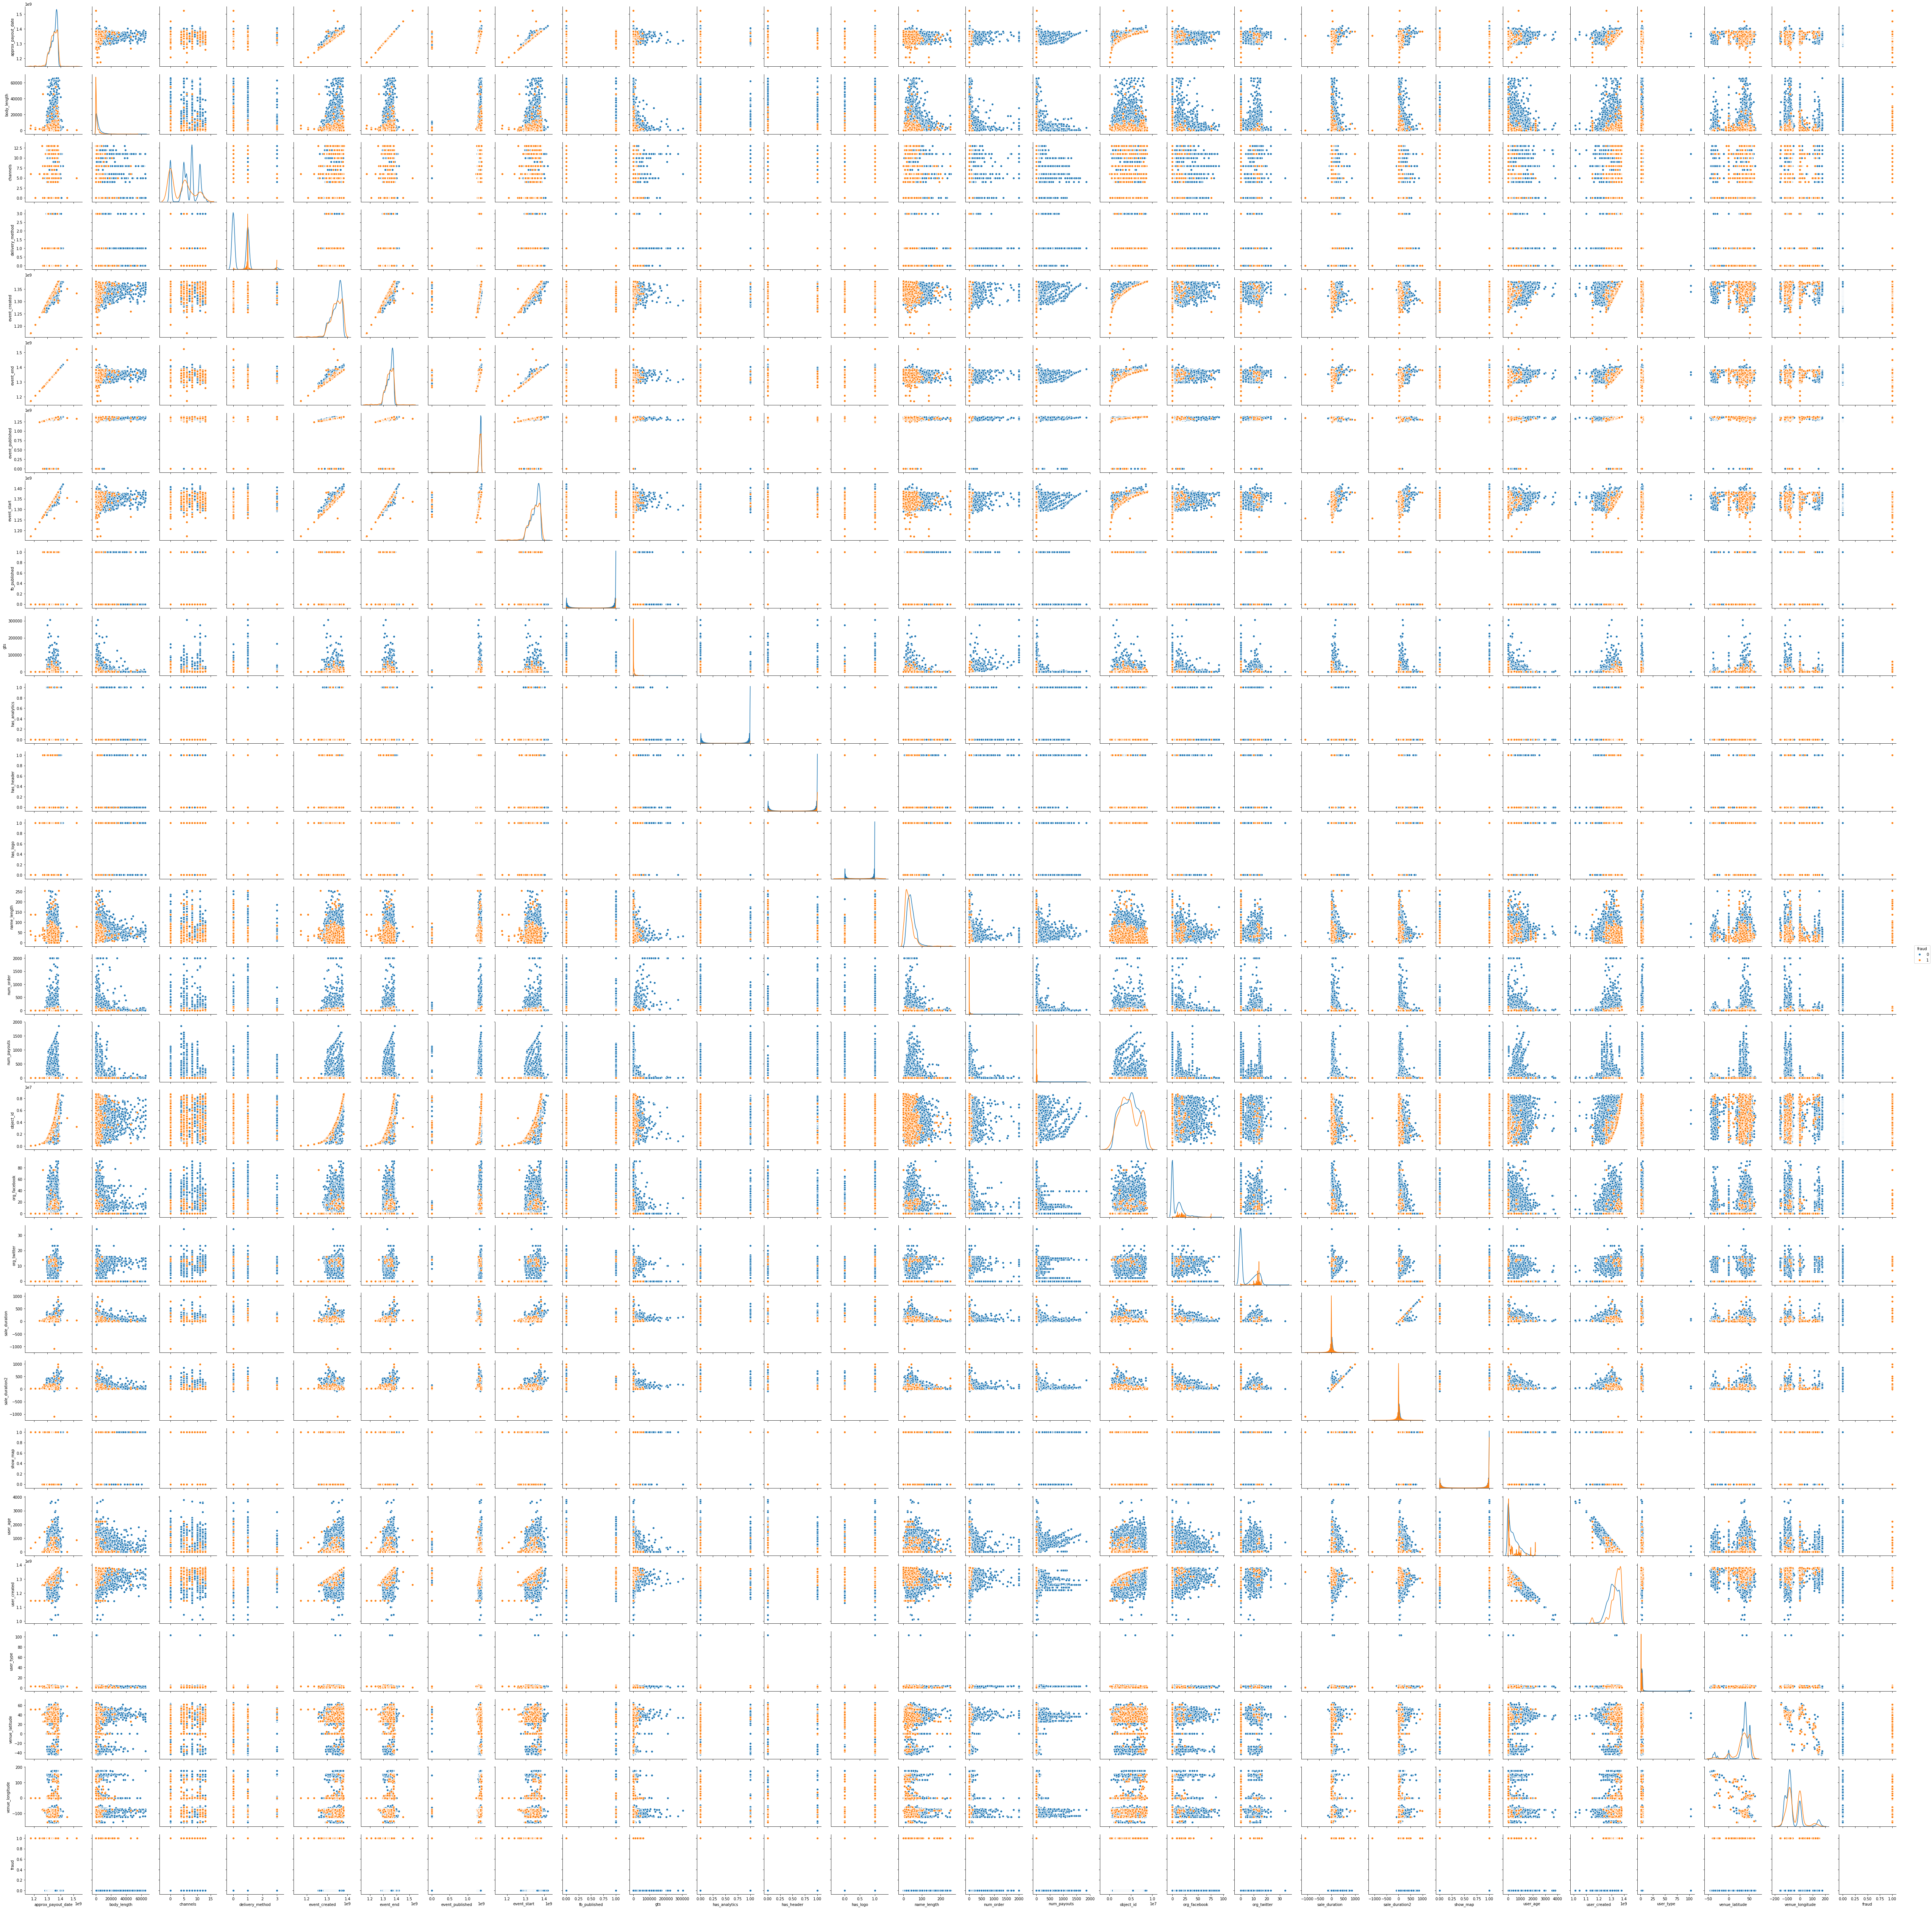

In [20]:
sns.pairplot(df,hue='fraud',diag_kind='kde')

In [38]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'fraud'],
      dtype='object')

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


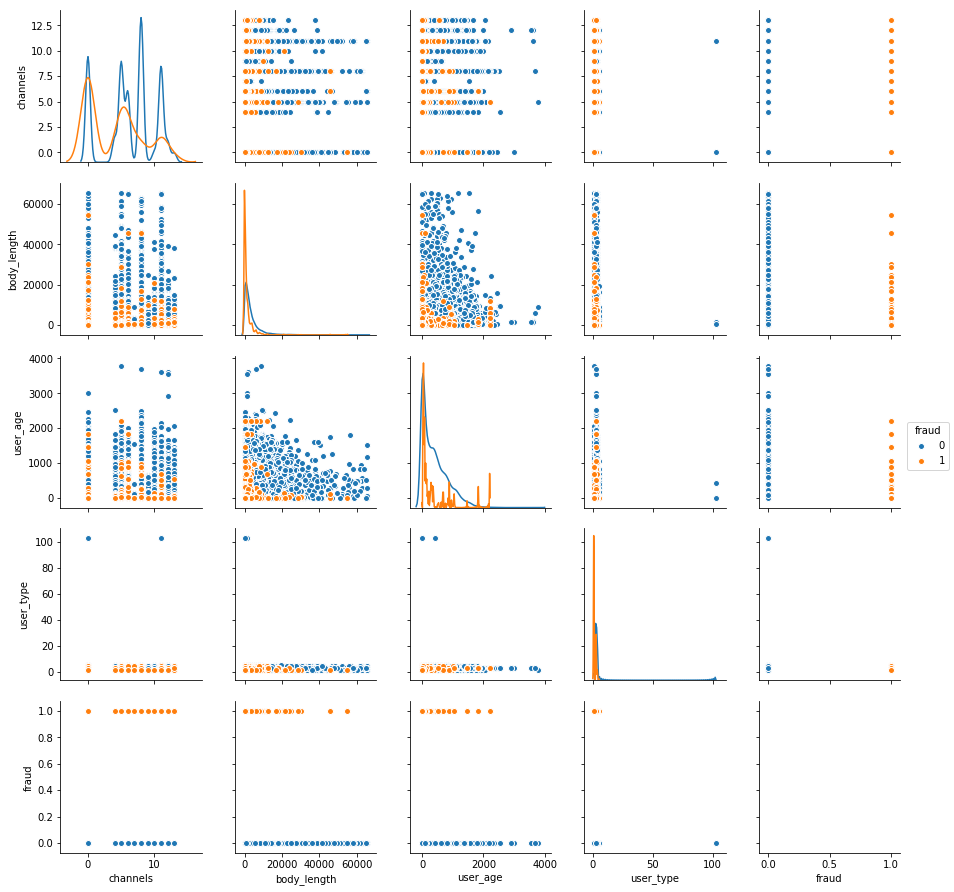

In [40]:
test = df[['channels','body_length','user_age','user_type','fraud']]
sns.pairplot(test,hue='fraud',diag_kind='kde')

In [27]:
df[['sale_duration']].head(5)

sale_duration
0           29.0
1           28.0
2           54.0
3            0.0
4           63.0

In [30]:
df[['has_logo']].head(5)

has_logo
0         0
1         1
2         0
3         1
4         0

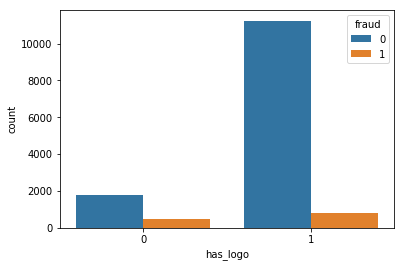

In [31]:
g = sns.countplot(x=df['has_logo'],hue=df['fraud'])

In [43]:
df[df['channels']==0]

acct_type  approx_payout_date  body_length  channels country  \
1              premium          1296720000         3499         0      US   
30             premium          1305018000          326         0      US   
32        spammer_warn          1305084600         6433         0      US   
80             premium          1321491600          666         0      US   
84             premium          1324170000            0         0      US   
92             premium          1322784000            0         0      US   
93             premium          1334872800         3407         0      US   
112            premium          1329107400         2547         0      US   
117            premium          1331746200          181         0      GB   
121       spammer_warn          1331582400         4305         0      US   
128          fraudster          1331953200         1045         0      GB   
138            premium          1337714100         7941         0      CA   
154            premium          1336867200         9024         0      US   
155            premium          1337626800         8467         0      CA   
162            premium          1344034800            0         0      US   
168            premium          1339110000         4150         0      US   
175            premium          1385614800         3713         0      US   
176            premium          1340607600        18094         0      US   
196            premium          1353556800         1938         0      US   
198            premium          1345183200         1283         0      US   
213            premium          1351386000          246         0      US   
215            premium          1351053000         5372         0      US   
217            premium          1380236400         7383         0      US   
247            premium          1351911600         2570         0      US   
257            premium          1351839300           33         0      US   
259    fraudster_event          1355097600            0         0      US   
262    fraudster_event          1352101200            0         0      VN   
266            premium          1370496600         2069         0      AU   
269            premium          1355720400         1279         0      US   
272    fraudster_event          1356069600         2307         0      AU   
...                ...                 ...          ...       ...     ...   
14151          premium          1335571200          194         0      US   
14166          premium          1337391000         1075         0      US   
14167          premium          1343946600         3287         0      US   
14168          premium          1337036400            0         0      US   
14176  spammer_limited          1340220600         3639         0      US   
14185          premium          1341261000         2158         0      AU   
14186     spammer_warn          1341370800         2837         0      US   
14188          premium          1341977400         4257         0      CA   
14190          premium          1354671000         6029         0      US   
14203  fraudster_event          1346713200            0         0      ES   
14210  spammer_limited          1349449200         3480         0      GB   
14218          premium          1351234800            0         0      US   
14235  fraudster_event          1351810800            0         0      US   
14242          premium          1362808800            0         0      US   
14245          premium          1365487200            0         0      US   
14247          premium          1351450800          820         0      US   
14255  fraudster_event          1351137600          854         0      CA   
14259          premium          1352361600          118         0      US   
14267     spammer_warn          1352937600           26         0      US   
14271  fraudster_event          1354273200          732         0      US   
14274    

In [47]:
# Looking to see how many columns have less that 80% of values filled
df_nulls = df.loc[:, df.isnull().mean() < .8]

In [51]:
len(df_nulls.columns)

45

In [50]:
len(df.columns)

45

In [70]:
# What columns to drop 
df[['org_facebook','org_twitter','fraud']].head(5)

org_facebook  org_twitter  fraud
0           0.0          0.0      1
1           0.0         12.0      0
2           0.0          0.0      0
3           0.0          0.0      0
4           0.0          0.0      0

# Keep
body_len, name_len, num_order, num_payouts, payout_type, user_age, user_type

# Try
gts, org_fb, org_twitter

# Don't Use

user_created, country, currency, listed

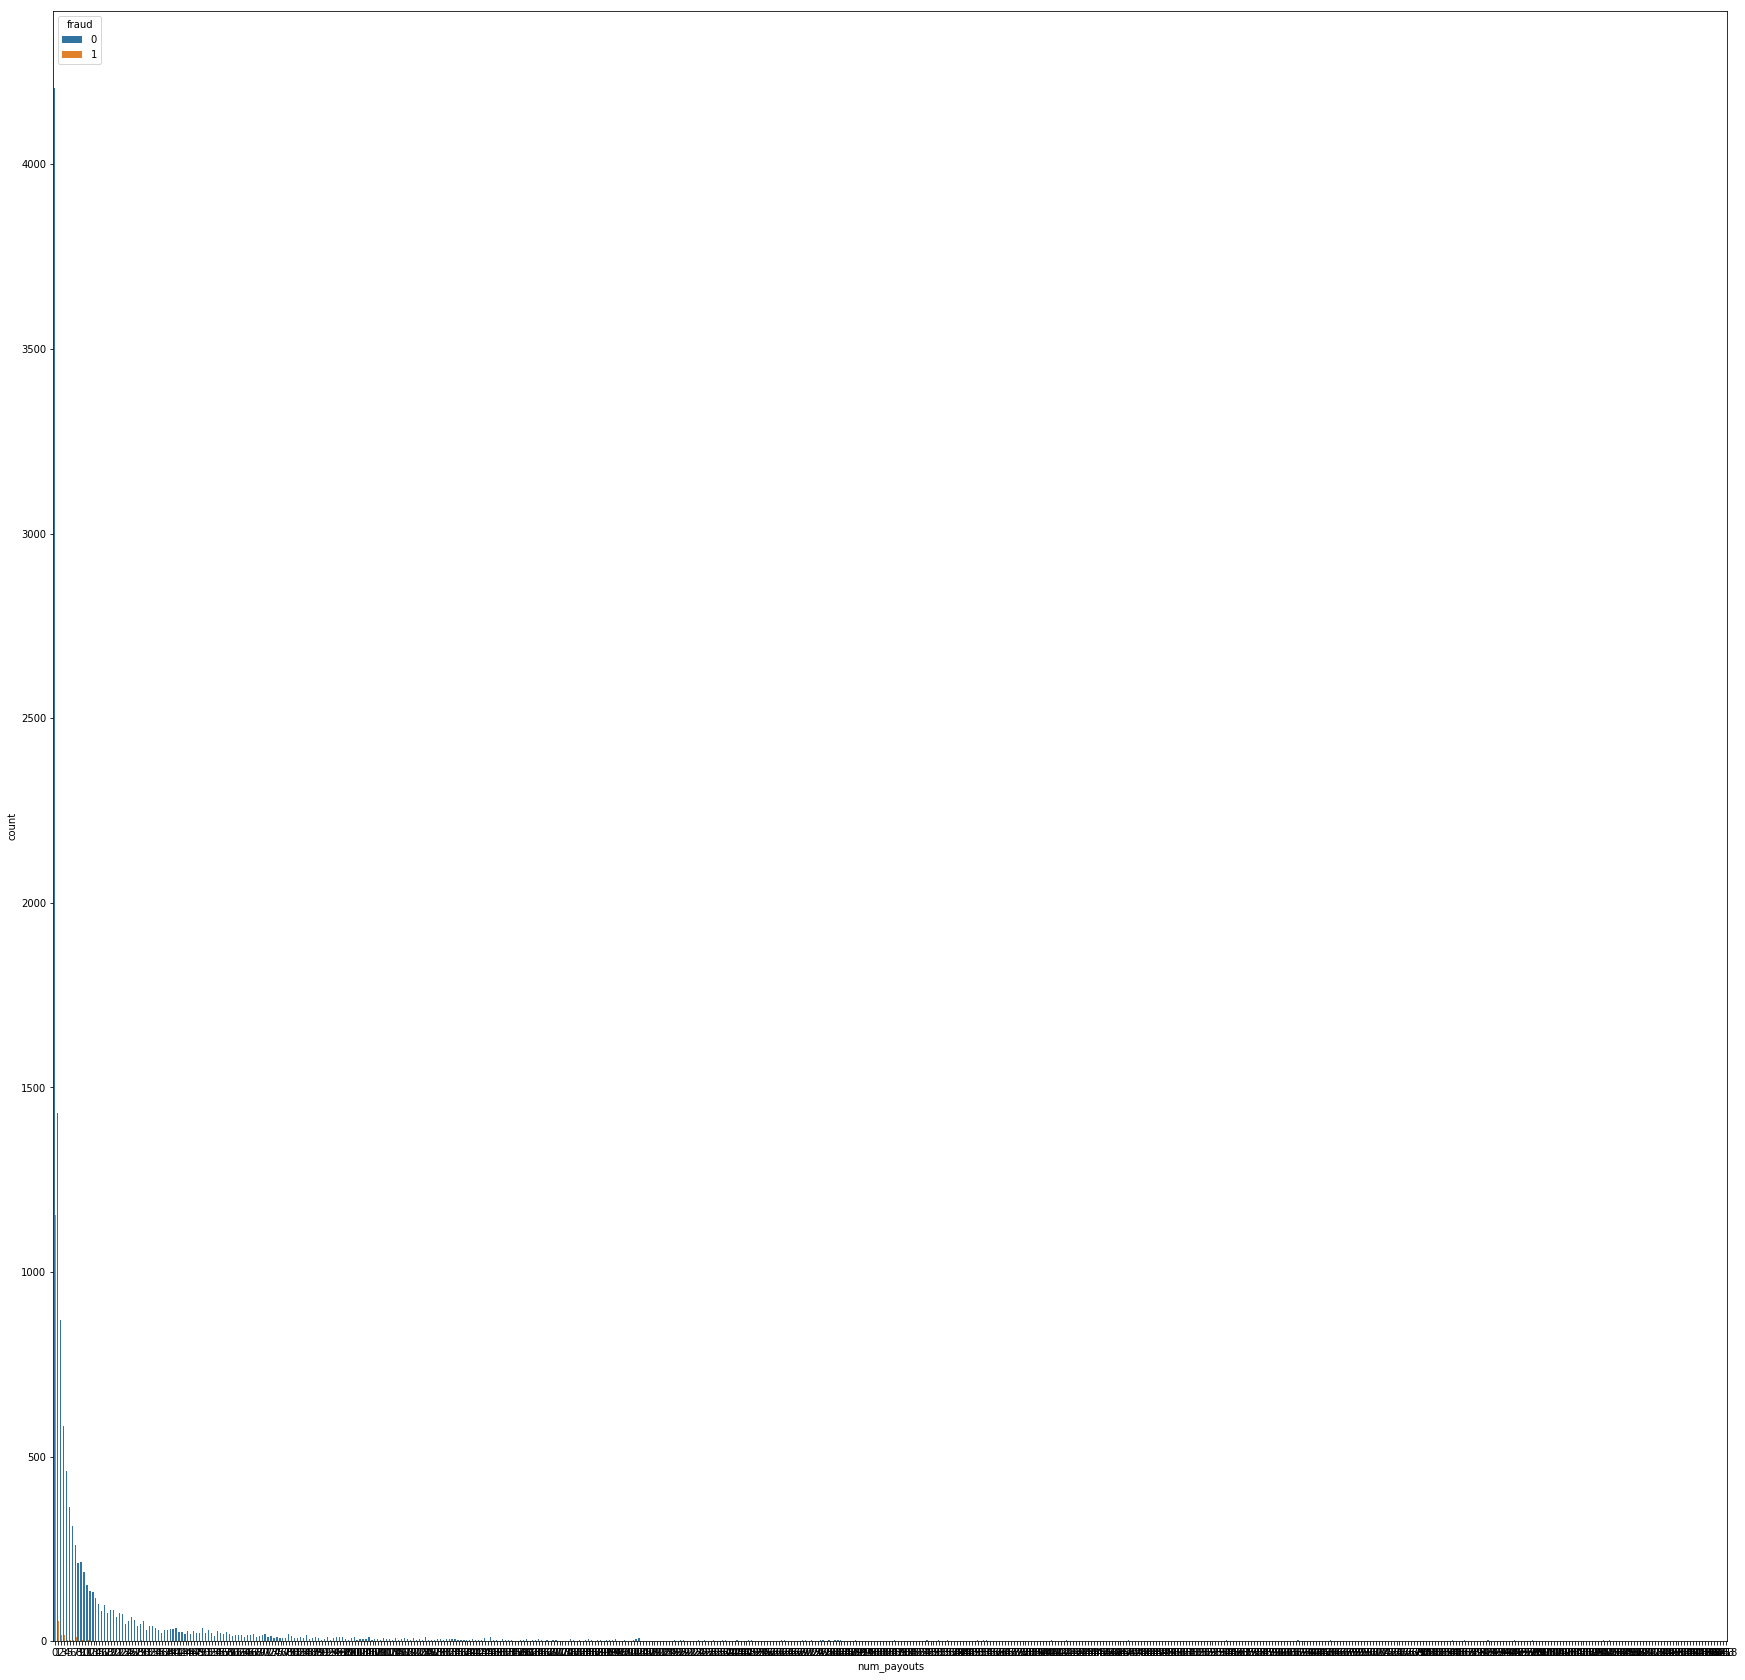

In [72]:
f, ax = plt.subplots(figsize=(30,30))
g = sns.countplot(x=df['num_payouts'],hue=df['fraud'])

In [73]:
df.gts.describe()

count     14337.000000
mean       2430.231492
std        9142.308260
min           0.000000
25%         116.410000
50%         431.930000
75%        1547.260000
max      306293.930000
Name: gts, dtype: float64

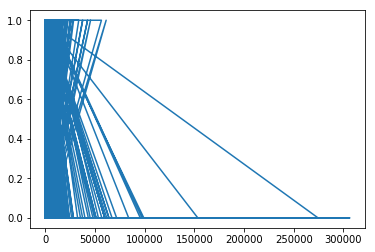

In [75]:
plt.plot(df.gts,df.fraud)

In [78]:
df_gts = df[df['gts'] < 20]

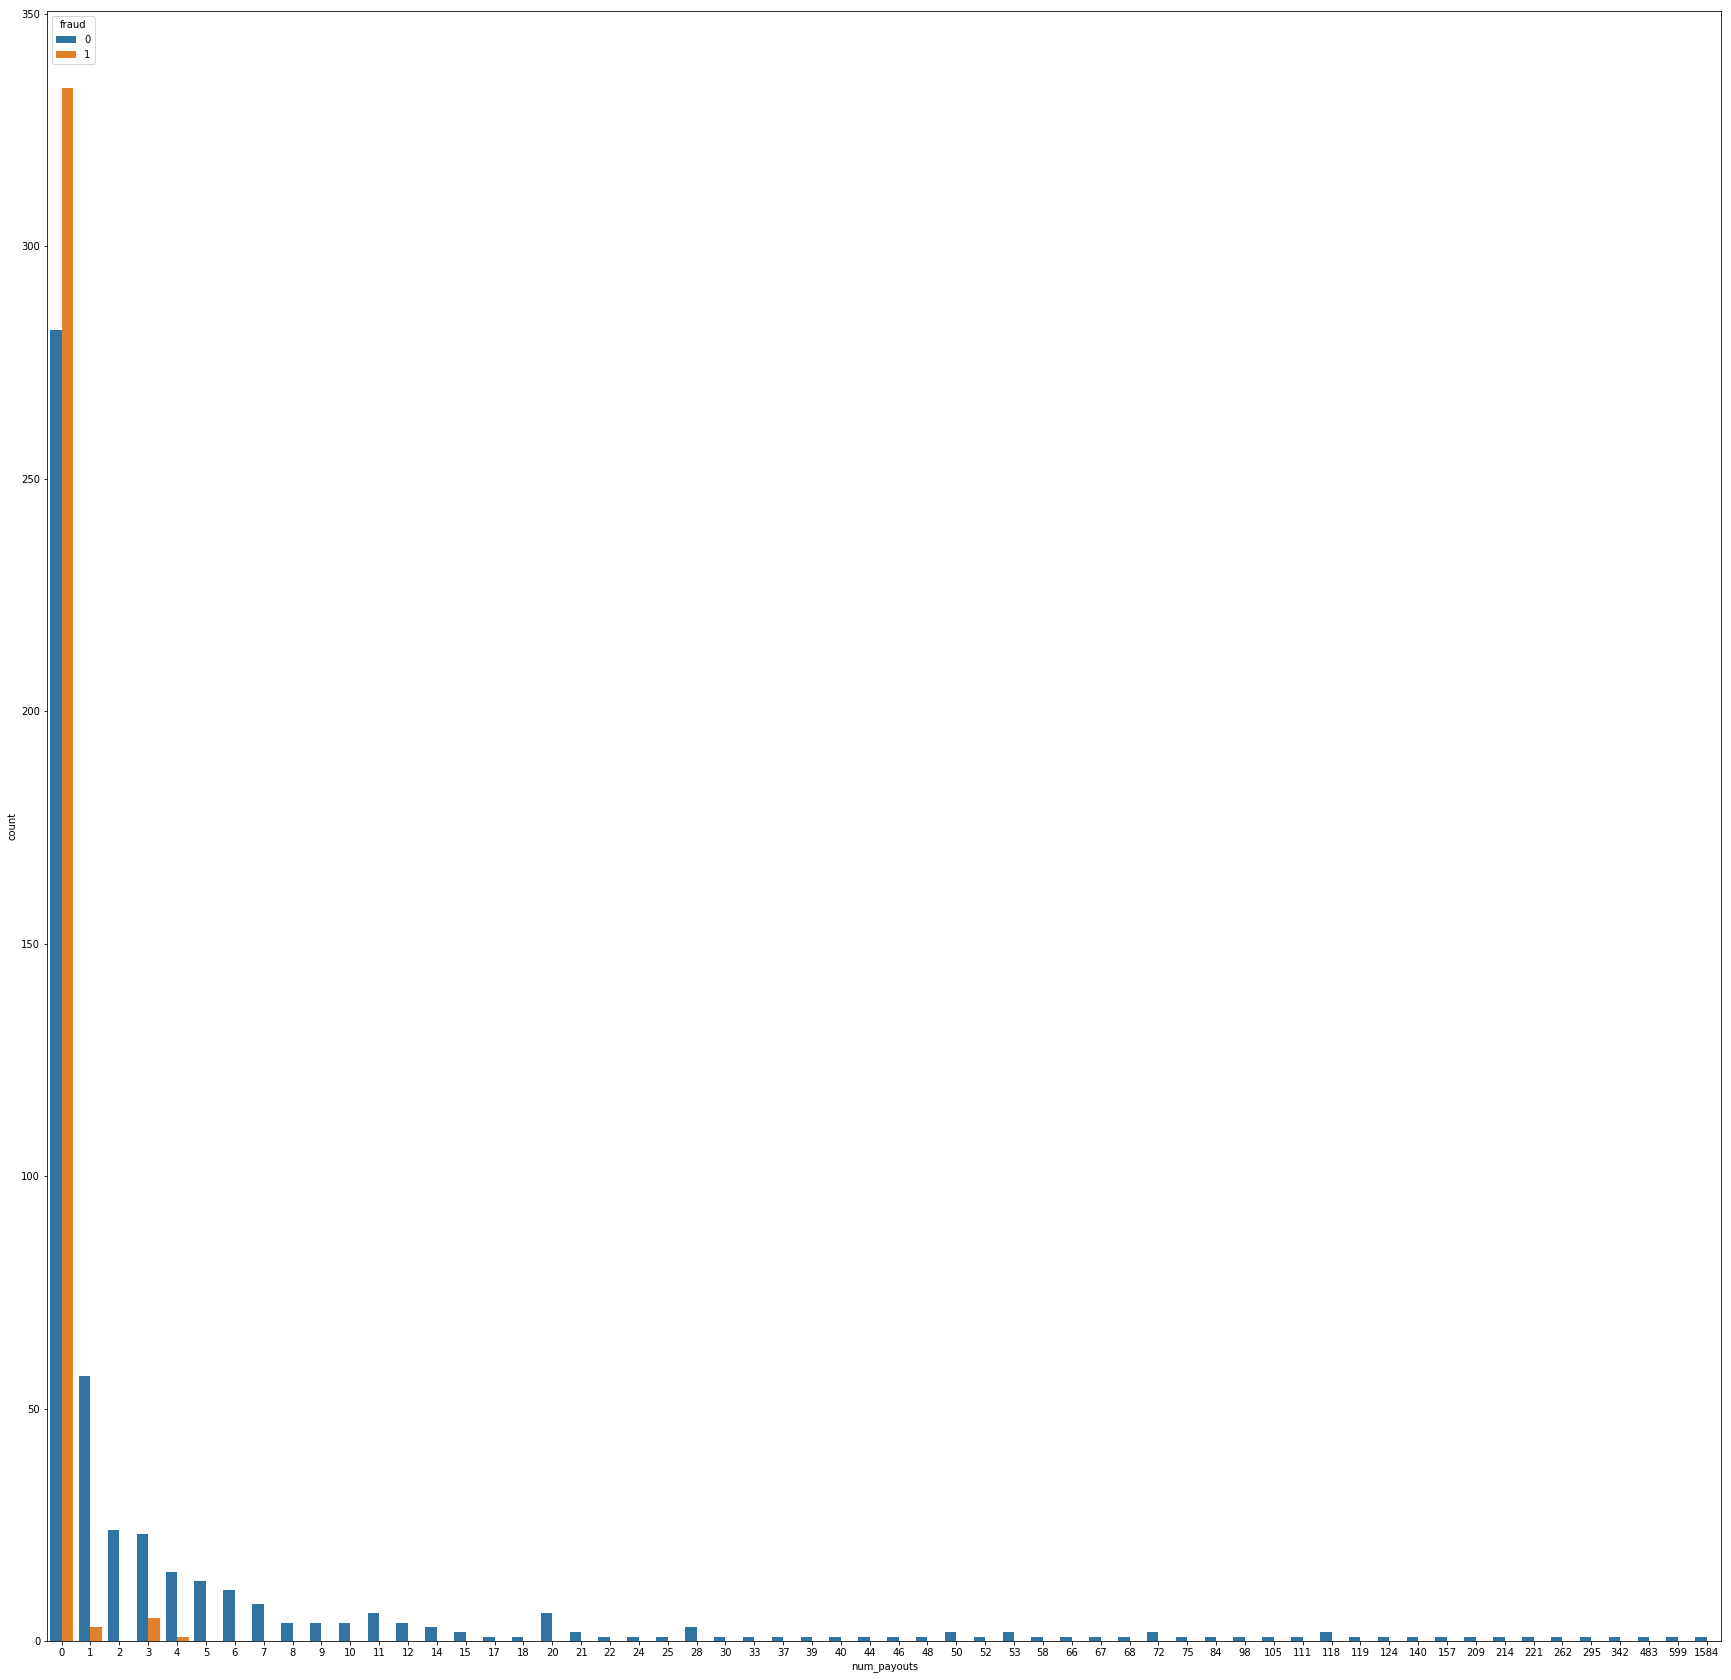

In [79]:
f, ax = plt.subplots(figsize=(30,30))
g = sns.countplot(x=df_gts['num_payouts'],hue=df['fraud'])

In [80]:
df.head(5)

acct_type  approx_payout_date  body_length  channels country  \
0  fraudster_event          1266062400         3852         5      US   
1          premium          1296720000         3499         0      US   
2          premium          1296172800         2601         8      US   
3          premium          1388966400        12347         6      IE   
4          premium          1297900800         2417        11      US   

  currency  delivery_method  \
0      USD              0.0   
1      USD              1.0   
2      USD              1.0   
3      EUR              1.0   
4      USD              0.0   

                                         description  \
0  <p><a href="http://s432.photobucket.com/albums...   
1  <p>Join us for a quick, one-night, community-b...   
2  <h3><span class="subcategory"><strong>Teacher ...   
3  <p style="margin-bottom: 1.3em; padding-bottom...   
4  <p>Writers and filmmakers need to understand t...   

                 email_domain  event_created  ...   user_age  user_created  \
0                   gmail.com     1262739706  ...         36    1259613950   
1                     ruf.org     1293832670  ...        149    1280942776   
2              pvsd.k12.ca.us     1291090956  ...        214    1272559388   
3        irishtabletennis.com     1360681570  ...        889    1283870102   
4  artsandbusinesscouncil.org     1291994666  ...         35    1288984065   

   user_type                 venue_address  venue_country  venue_latitude  \
0          1         717 Washington Avenue             US       25.777471   
1          3                                           US       32.776566   
2          3  10100 Pioneer Blvd Suite 100             US       33.944201   
3          3                                         None             NaN   
4          3        One Marina Park Drive              US       42.353848   

   venue_longitude                              venue_name venue_state fraud  
0       -80.133433             INK Nightclub - South Beach          FL     1  
1       -79.930922                 The Charleston, SC area          SC     0  
2      -118.080419  Los Angeles County Office of Education          CA     0  
3              NaN                                    None        None     0  
4       -71.044276                       Fish & Richardson          MA     0  

[5 rows x 45 columns]

In [2]:
fraud_df = df[df['fraud']==1]

NameError: name 'df' is not defined